# Pre-Processing of Data

In [91]:
# Misc
import os
import sys
from timeit import default_timer as timer 
import datetime
now = datetime.datetime.now()

# Data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np


# Sanity check for jupyter notebooks
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\gabri\Documents\GitHub\IceClassic\PreProcessData


## Location Data
 - Nearest landmark to the tripod is the [Mears Memorial Bridge](https://www.google.com/maps/place/Mears+Memorial+Bridge/@64.5673074,-149.0813003,17z/data=!3m1!4b1!4m6!3m5!1s0x513297804d87b329:0xbf991116ff77a5ad!8m2!3d64.5673074!4d-149.0787254!16s%2Fm%2F04zw16f?entry=ttu) (64.57$^{\circ}$, -149.08$^{\circ}$)
 - Nearest Weather Station  [Nenana Municipal Airport](https://data.berkeleyearth.org/stations/167752) (64.55$^{\circ}$, -149.07$^{\circ}$). Approximately 2 km from exact location
- Nearest City  Fairbanks. Approximate 50 km

## Temperature Data
Considering the collected data, the most detailed and complete dataset  is the Berkeley Data

### Berkeley Data 
Lets consider the [Berkeley  Global dataset](https://berkeleyearth.org/data/) 

- Resolution 1$^{\circ}$  x 1$^{\circ}$

#### Original Berkeley Data ( *Berkeley temp data.txt*)
The "old"  Berkeley data (1890/01/01-2018/05/31) has a wildly! inconsistent use of delimiters, I could have used clever regex, but instead I opened it in excel and fixed manually (using the fancy excel  data importer assigning zero to blank columns, sum value of columns.).

The fixed file is adeptly called *Berkeley temp data -Fixed.txt* 

In [101]:
# loading 'old'data'
temp_berkeley= pd.read_csv('Berkeley temp -Fixed.txt',skiprows=23,index_col=0,delimiter='\t') 
temp_berkeley.index = pd.to_datetime(temp_berkeley.index, format='%Y%m%d')


#Load 'updated' data

temp_berkeley_updated=pd.read_csv('Berkeley temp data updated.txt',skiprows=48,index_col=0,delimiter=' ' ) # data created following the proceduer indicated in the following cells  
temp_berkeley_updated.index = pd.to_datetime(temp_berkeley_updated.index)

#### Creating the Updated Berkely Data (*Berkeley temp data updated.txt*)
- Daily measurements from 1880/01/01 to 2022/07/31 

There seem to be a slight consistent difference between the two location( ~50 km apart ) , in absence of any other information or analysis we just take the average.

#### Comparison of Data

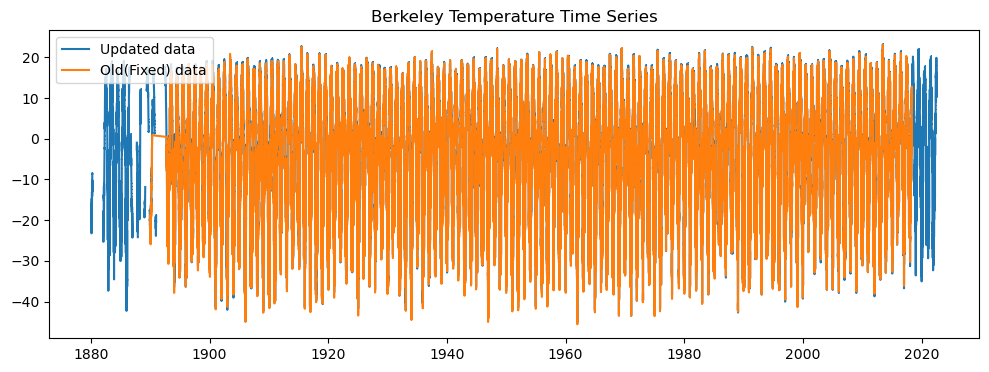

In [102]:
fig, ax1 = plt.subplots(figsize=(12, 4)) 

ax1.plot(temp_berkeley_updated,marker=',',label="Updated data")
ax1.plot(temp_berkeley,marker=',',label="Old(Fixed) data")
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')
plt.title('Berkeley Temperature Time Series')
plt.show()


The values appear to match, however lets keep in mind that the values for the new data were extracted directly from the netCDF4 object and we considered the average of the nearest quadrants. For the case of the old data, in the metadata ( header of the .txt file ) we see that
> ave_region :: lon= -149.000 -148.000, lat=   64.000   65.000
>
> taking grid box region lon= -149.000 -148.000, lat=   64.000   65.000,

However, at least on the updated netCFD4 file, the coordinates discretization available were

> region :: lon= -149.500 -148.500, lat=   64.500 

So the considered region might not be exactly the same for both datasets.

Again, the original coordinates are 
 
**lon =-149.08$^{\circ}$, lat=64.57$^{\circ}$**



We assumed that 
(lat=64.5$^{\circ}$, long=-149$^{\circ}$) is for the quadrant lat= 64.5$^{\circ}$+-0.5$^{\circ}$ long=-149$^{\circ}$+-0.5$^{\circ}$  which makes sense, but I am not 100 % sure from the description of the data.

Other interpolation methods using nearby quadrant can be easily made if considered relevant

## Precipitation Data
We will consider the data from [NOAA GHCN](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00026435/detail) from 

- NENANA MUNICIPAL AIRPORT, AK US (USW00026435) 
- FAIRBANKS INTERNATIONAL AIRPORT, AK US (USW00026411

In [104]:
columns_to_import = ['DATE','PRCP', 'SNOW','SNWD','TMAX','TMIN']


# NENANA Airport
Nenana_pp= pd.read_csv('NOAA_PRPP_NENANA.txt',usecols=columns_to_import,skiprows=629,delimiter='\t')
Nenana_pp['DATE'] = pd.to_datetime(Nenana_pp['DATE'])
Nenana_pp.set_index('DATE', inplace=True)

# Fairbanks Airport
Fairbanks_pp= pd.read_csv('NOAA_PRPP_Fairbanks.txt',usecols=columns_to_import,skiprows=629,delimiter='\t')
Fairbanks_pp['DATE'] = pd.to_datetime(Fairbanks_pp['DATE'])
Fairbanks_pp.set_index('DATE', inplace=True)


### Comparison of Stations

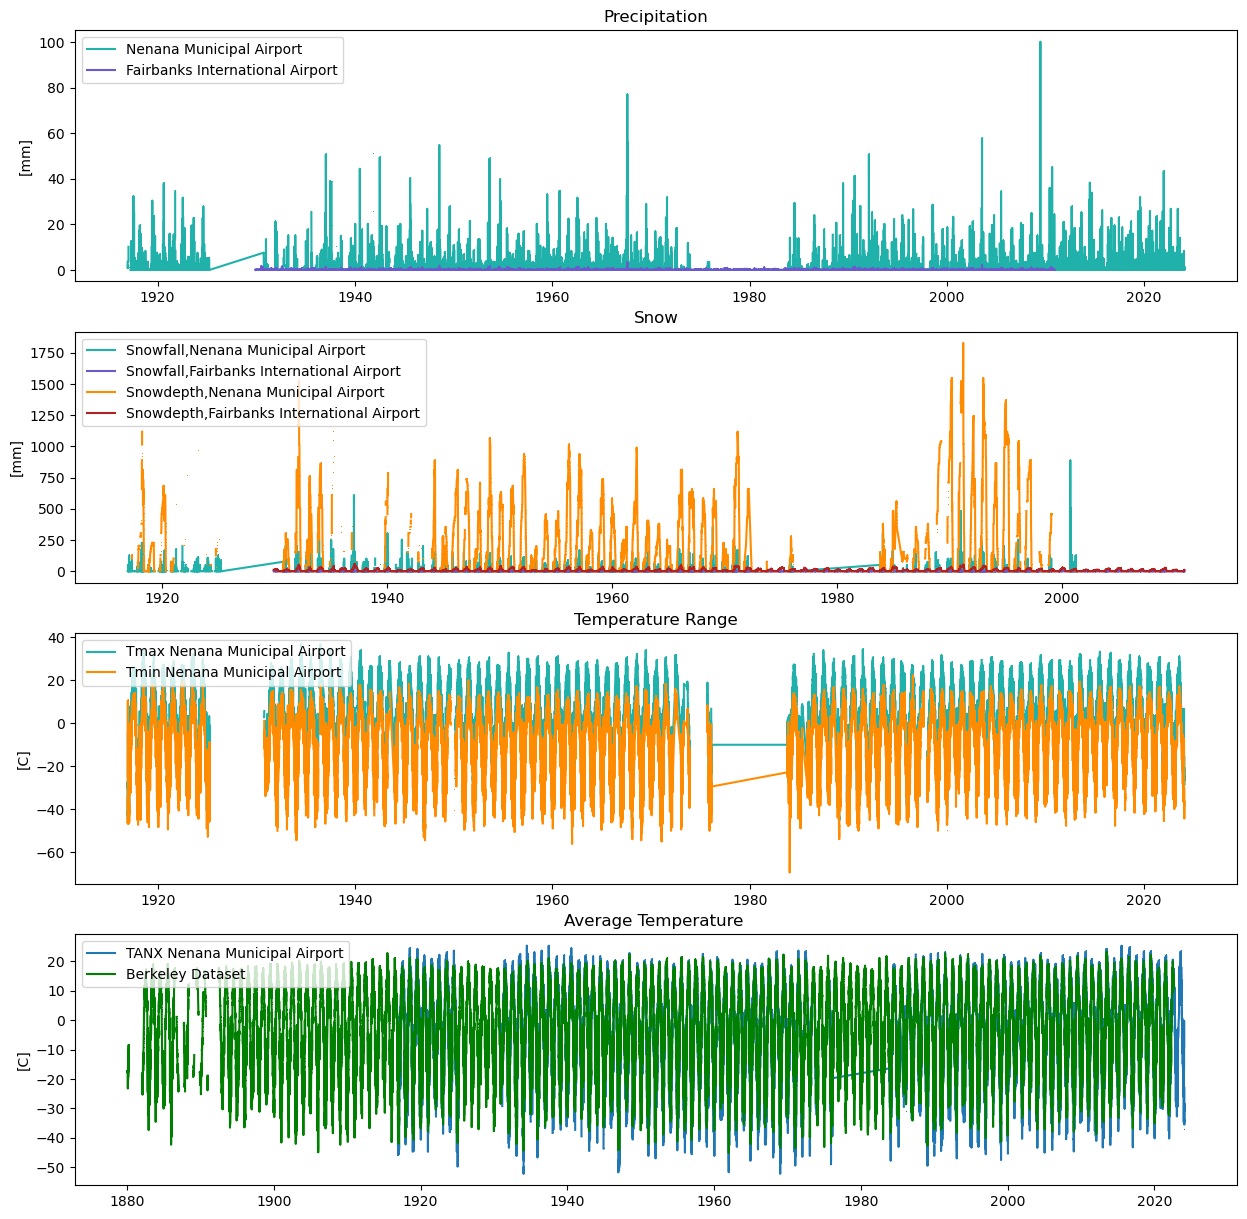

In [105]:
fig, ax1 = plt.subplots(4,1,figsize=(15, 15)) 
color1='lightseagreen'
color2='slateblue'
color3='darkorange'
color4='firebrick'

ax1[0].plot(Nenana_pp['PRCP'],marker=',',label="Nenana Municipal Airport",color=color1)
ax1[0].plot(Fairbanks_pp['PRCP'],marker=',',label="Fairbanks International Airport",color=color2)
ax1[0].tick_params(axis='y')
ax1[0].set_ylabel("[mm]")
ax1[0].legend(loc='upper left')
ax1[0].set_title("Precipitation")

ax1[1].plot(Nenana_pp['SNOW'],marker=',',label="Snowfall,Nenana Municipal Airport",color=color1)
ax1[1].plot(Fairbanks_pp['SNOW'],marker=',',label="Snowfall,Fairbanks International Airport",color=color2)
ax1[1].plot(Nenana_pp['SNWD'],marker=',',label="Snowdepth,Nenana Municipal Airport",color=color3)
ax1[1].plot(Fairbanks_pp['SNWD'],marker=',',label="Snowdepth,Fairbanks International Airport",color=color4)
ax1[1].tick_params(axis='y')
ax1[1].set_ylabel("[mm]")
ax1[1].legend(loc='upper left')
ax1[1].set_title("Snow")

ax1[2].plot(Nenana_pp['TMAX'],marker=',',label="Tmax Nenana Municipal Airport",color=color1)
ax1[2].plot(Nenana_pp['TMIN'],marker=',',label="Tmin Nenana Municipal Airport",color=color3)
ax1[2].tick_params(axis='y')
ax1[2].set_ylabel("[C]")
ax1[2].legend(loc='upper left')
ax1[2].set_title("Temperature Range")


ax1[3].plot(0.5*(Nenana_pp['TMAX']+Nenana_pp['TMIN']),marker=',',label="TANX Nenana Municipal Airport")
ax1[3].plot(temp_berkeley_updated,marker=',',label="Berkeley Dataset",color='green')
ax1[3].tick_params(axis='y')
ax1[3].set_ylabel("[C]")
ax1[3].legend(loc='upper left')
ax1[3].set_title("Average Temperature ")


plt.show()

### Conclusions & Questions
Conclusions
- Data from Fairbanks station is not representative of conditions at Nenana(local effects ?).
- The global Berkeley data seem to fit the local measurements. Maybe play and try to use the Berkeley data to estimate the local temperature for the dates that we dont have.
- For unusual weather event such as volcanic ash, smoke, tornado,water spout, etc. Import attribute WTXX and check documentation, useful to understand anomalous values

Questions
- Is humidity a factor? We have the data from NOAA, for max, min and average
- Is wind  factor? If yes, which wind parameter, xmin wind speed , max wind gust, 24h wind mov, etc


## Discharge

Discharge from USGS water data, [USGS 15515500 TANANA R AT NENANA AK](https://waterdata.usgs.gov/monitoring-location/15515500/#parameterCode=00065&period=P7D&showMedian=false)
- Max/Min and Avergae daily discharge data
- Max/min and mean daily water temperature data

Upstream station: [USGS 15485500 Tanana R at Fairbanks AK](https://waterdata.usgs.gov/monitoring-location/15485500/#parameterCode=00065&period=P7D&showMedian=false) 
[Other nearby stations and other nearby station](https://dashboard.waterdata.usgs.gov/app/nwd/en/?region=lower48&aoi=default) 


In [138]:
# TENANA R Nenana
cols=['datetime','1103_00010_00001','1104_00010_00002','1105_00010_00003','1106_00060_00003']
dict= {'1103_00010_00001': 'Max water temp [C]', '1104_00010_00002': 'Min water temp [C]','1105_00010_00003': 'Mean water temp [C]','1106_00060_00003':'Mean Discharge [m3/s]'}
Nenana_R_1= pd.read_csv('USGS_Tenana_R_Nenana.txt',skiprows=33,usecols=cols,delimiter='\t')
Nenana_R_1.rename(columns=dict,
          inplace=True)
Nenana_R_1['datetime'] = pd.to_datetime(Nenana_R_1['datetime'])
Nenana_R_1.set_index('datetime', inplace=True)

# changing units from ft^3/s to m3/s ( when we change the name we change it to new units ( original unit are ft^3 as we can see in documentation)
Nenana_R_1['Mean Discharge [m3/s]']= pd.to_numeric(Nenana_R_1['Mean Discharge [m3/s]'])
Nenana_R_1['Mean Discharge [m3/s]'] = Nenana_R_1['Mean Discharge [m3/s]']*0.02832 # to  m^3/s (cubic meters per second) 



# TENANA R Fairbanks
cols=['datetime','1085_00060_00003']
dict= {'1085_00060_00003':'Mean Discharge [m3/s]'}
Nenana_R_2= pd.read_csv('USGS_Tenana_R_Fairbanks.txt',skiprows=29,usecols=cols,delimiter='\t')
Nenana_R_2.rename(columns=dict,
          inplace=True)
Nenana_R_2['datetime'] = pd.to_datetime(Nenana_R_2['datetime'])
Nenana_R_2.set_index('datetime', inplace=True)

# changing units from ft^3/s to m3/s
Nenana_R_2['Mean Discharge [m3/s]']= pd.to_numeric(Nenana_R_2['Mean Discharge [m3/s]'])
Nenana_R_2['Mean Discharge [m3/s]'] = Nenana_R_2['Mean Discharge [m3/s]']*0.02832 # to  m^3/s (cubic meters per second) 

Text(0.5, 1.0, 'Tenana River')

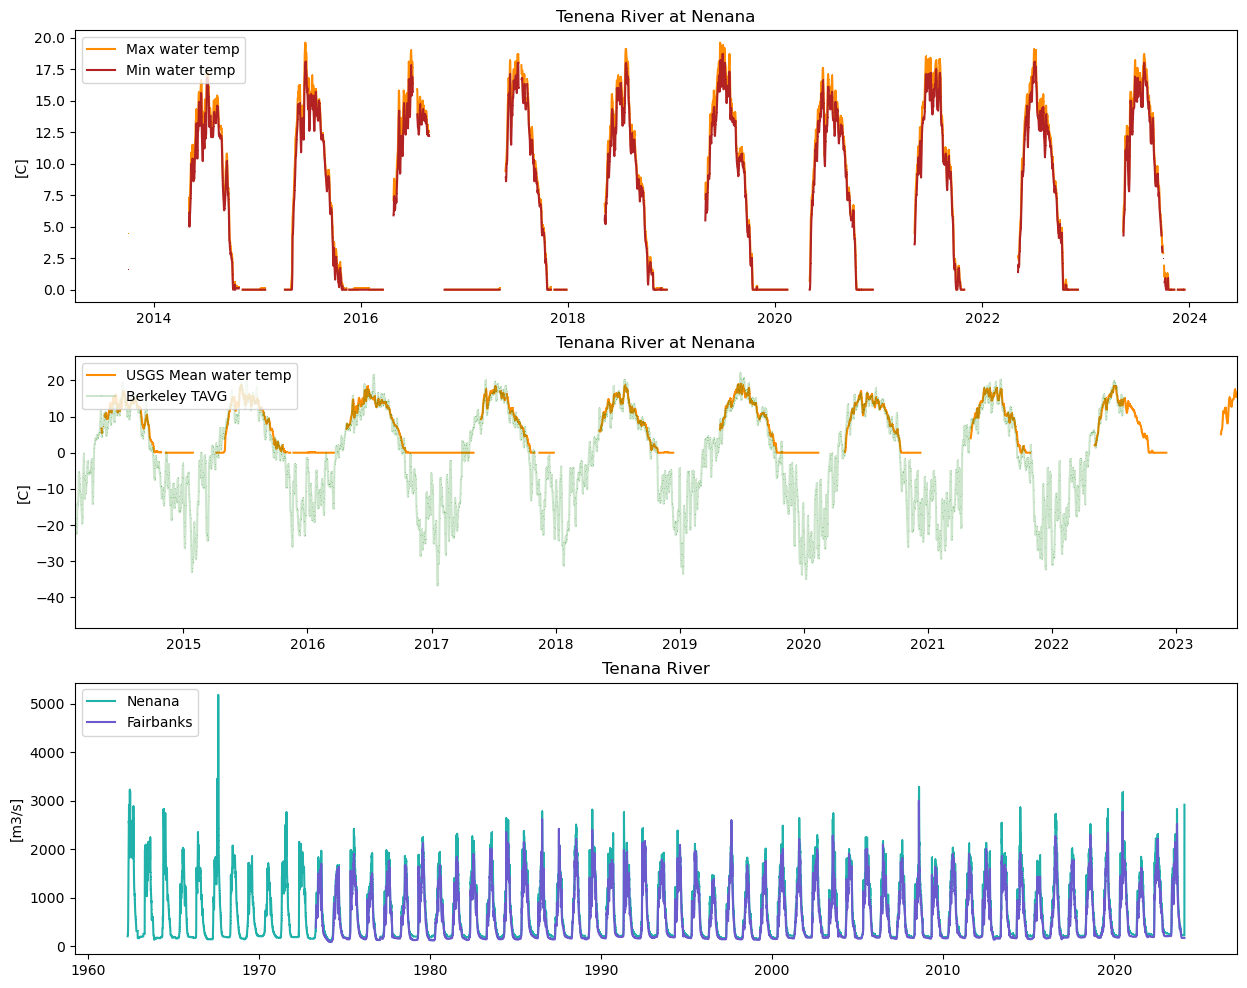

In [150]:
fig, ax1 = plt.subplots(3,1,figsize=(15, 12)) 
ax1[0].plot(Nenana_R_1['Max water temp [C]'],marker=',',label="Max water temp",color=color3)
ax1[0].plot(Nenana_R_1['Min water temp [C]'],marker=',',label="Min water temp",color=color4)
#ax1[0].plot(Fairbanks_p['PRCP'],marker=',',label="Fairbanks International Airport",color=color2)
ax1[0].tick_params(axis='y')
ax1[0].set_ylabel("[C]")
ax1[0].legend(loc='upper left')
ax1[0].set_title("Tenena River at Nenana")

ax1[1].plot(Nenana_R_1['Mean water temp [C]'],marker=',',label="USGS Mean water temp",color=color3)
ax1[1].plot(temp_berkeley_updated,marker=',',label="Berkeley TAVG",color='green',alpha=0.2)
#ax1[0].plot(Fairbanks_p['PRCP'],marker=',',label="Fairbanks International Airport",color=color2)
ax1[1].tick_params(axis='y')
ax1[1].set_ylabel("[C]")
ax1[1].legend(loc='upper left')
ax1[1].set_title("Tenana River at Nenana")
ax1[1].set_xlim(pd.Timestamp('2014-02-15'), pd.Timestamp('2023-07-01'))

ax1[2].plot(Nenana_R_1['Mean Discharge [m3/s]'],marker=',',label="Nenana",color=color1)
ax1[2].plot(Nenana_R_2['Mean Discharge [m3/s]'],marker=',',label="Fairbanks",color=color2)
ax1[2].tick_params(axis='y')
ax1[2].set_ylabel("[m3/s]")
ax1[2].legend(loc='upper left')
ax1[2].set_title("Tenana River")